MergeSort: $O(n\log(n))$

In [ ]:
#3

#4

In [ ]:
#4

**RadixSort**: $O(d \cdot n)$, где $d$ - количество разрядов(в данном случае 16-ричных)

Таким образом имеет смысл переходить на **RadixSort** в любом из процессов при условии $d < \alpha \log(n)$, но для uint64_t, $max\{d\} = 16$. Это условие начинает выполнятся достаточно быстро, и вычисление разрядности лишь мешает в случае малого размера масива. Поэтому условие было заменено на $n > n_0$.

Text(0.5, 1.0, '2 processes')

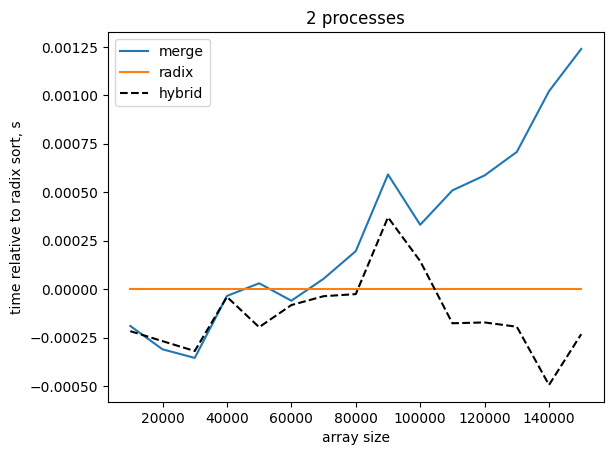

In [36]:
import matplotlib.pyplot as plt

ns = [1e3, 1e4, 1e5, 1e6, 1e7, 1e8]
merge_sort_ts = [2.24e-4, 1.53e-3, 1.69e-2, 1.89e-1, 2.12, 23.92]
radix_sort_ts = [2.40e-4, 1.72e-3, 1.61e-2, 1.595e-1, 1.6673, 16.83]
hybrid_sort_ts = [2.16e-4, 1.56e-3, 1.68e-2, 1.58e-1, 1.70, 16.58]

ns = [1e4 * x for x in range(1, 16)]
merge_sort_ts = [0.00159155, 0.00289749, 0.00433589, 0.00617119, 0.00769613, 0.00928062, 0.0107543, 
                 0.0126433, 0.0143156, 0.0158282, 0.0172048, 0.0191457, 0.0204429, 0.0230101, 0.0239822]
radix_sort_ts = [0.00178133, 0.00320764, 0.00469027, 0.00620601, 0.00766568, 0.00934002, 0.0107007, 
                 0.012447, 0.0137238, 0.0154961, 0.0166952, 0.018559, 0.019735, 0.021989, 0.0227431]
hybrid_sort_ts = [0.00156492, 0.00293966, 0.00437144, 0.00616639, 0.00746976, 0.00925813, 0.0106645, 
                  0.0124216, 0.0140945, 0.0156407, 0.0165195, 0.0183875, 0.0195414, 0.0214953, 0.0225113]

merge_sort_ts = [x - y for x,y in  zip(merge_sort_ts, radix_sort_ts)]
hybrid_sort_ts = [x - y for x,y in  zip(hybrid_sort_ts, radix_sort_ts)]
radix_sort_ts = [x - y for x,y in  zip(radix_sort_ts, radix_sort_ts)]

plt.plot(ns, merge_sort_ts, label="merge")
plt.plot(ns, radix_sort_ts, label="radix")
plt.plot(ns, hybrid_sort_ts, "--", label="hybrid", color="black")
#plt.xscale("log")
#plt.yscale("log")
plt.xlabel("array size")
plt.ylabel("time relative to radix sort, s")
plt.legend()
plt.title("2 processes")